## Importing libraries and reading data

In [177]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,PowerTransformer,StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')


import xgboost as XGB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection  import SelectKBest,mutual_info_regression,f_regression,f_classif
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier,
                              VotingClassifier)
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from xgboost import XGBRegressor

In [178]:
train=pd.read_csv('train.csv',index_col='Id')
test=pd.read_csv('test.csv',index_col='Id')

## Understanding the Data

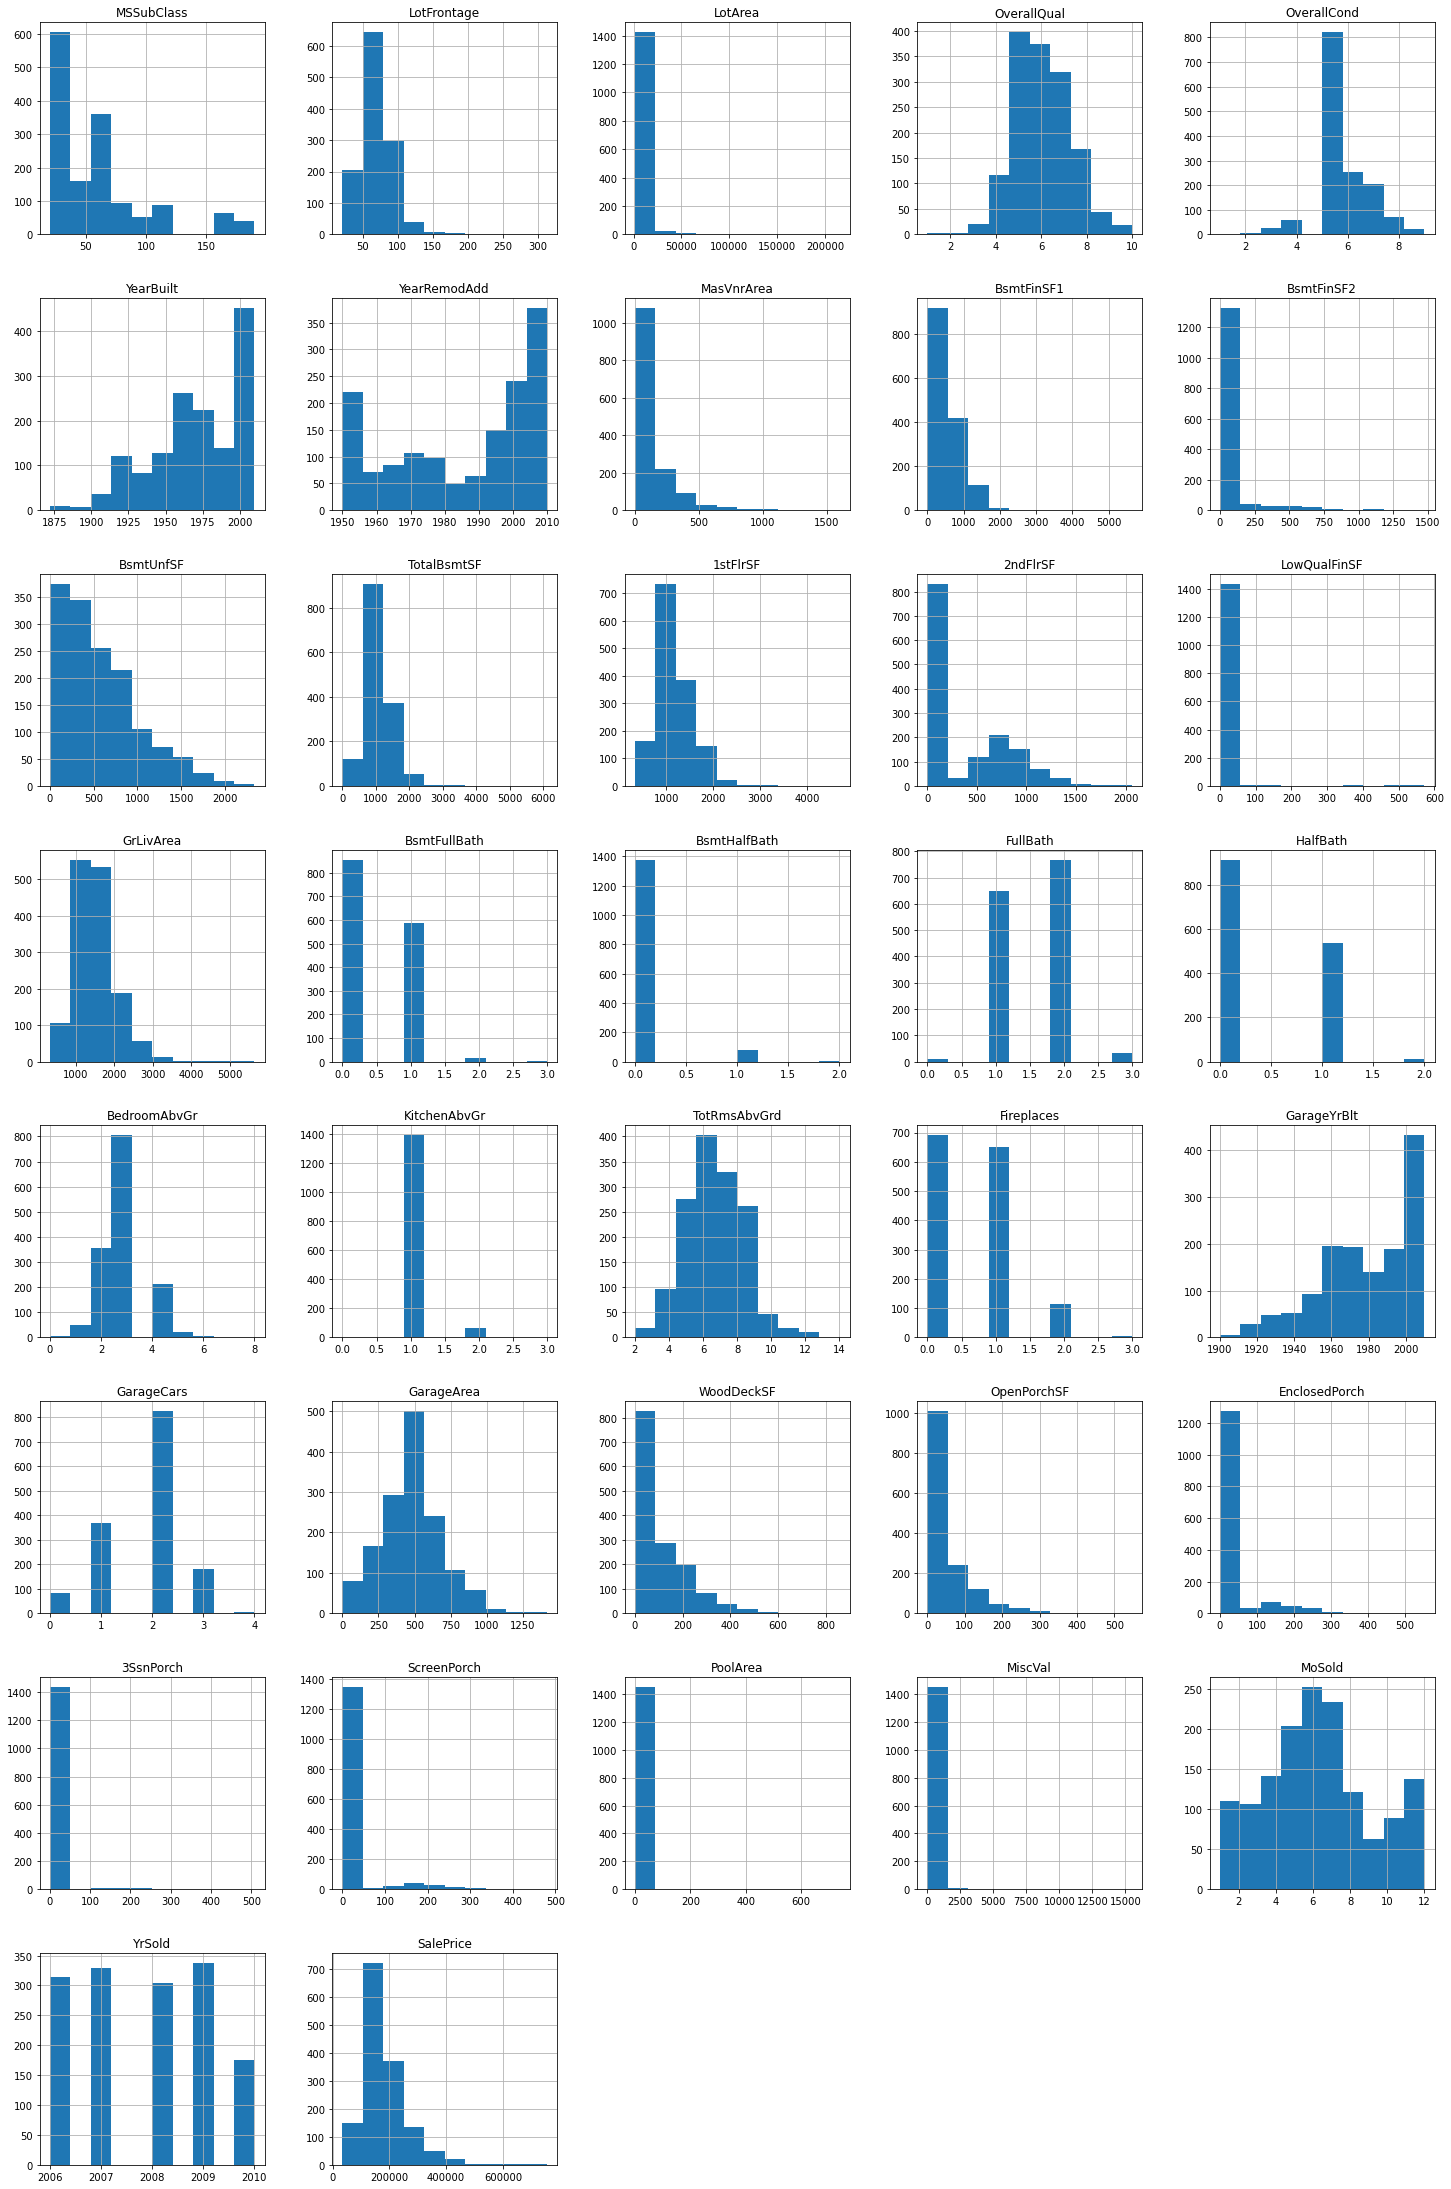

In [179]:
train.hist(figsize=(25,80),layout=(16,5))
plt.show() ;

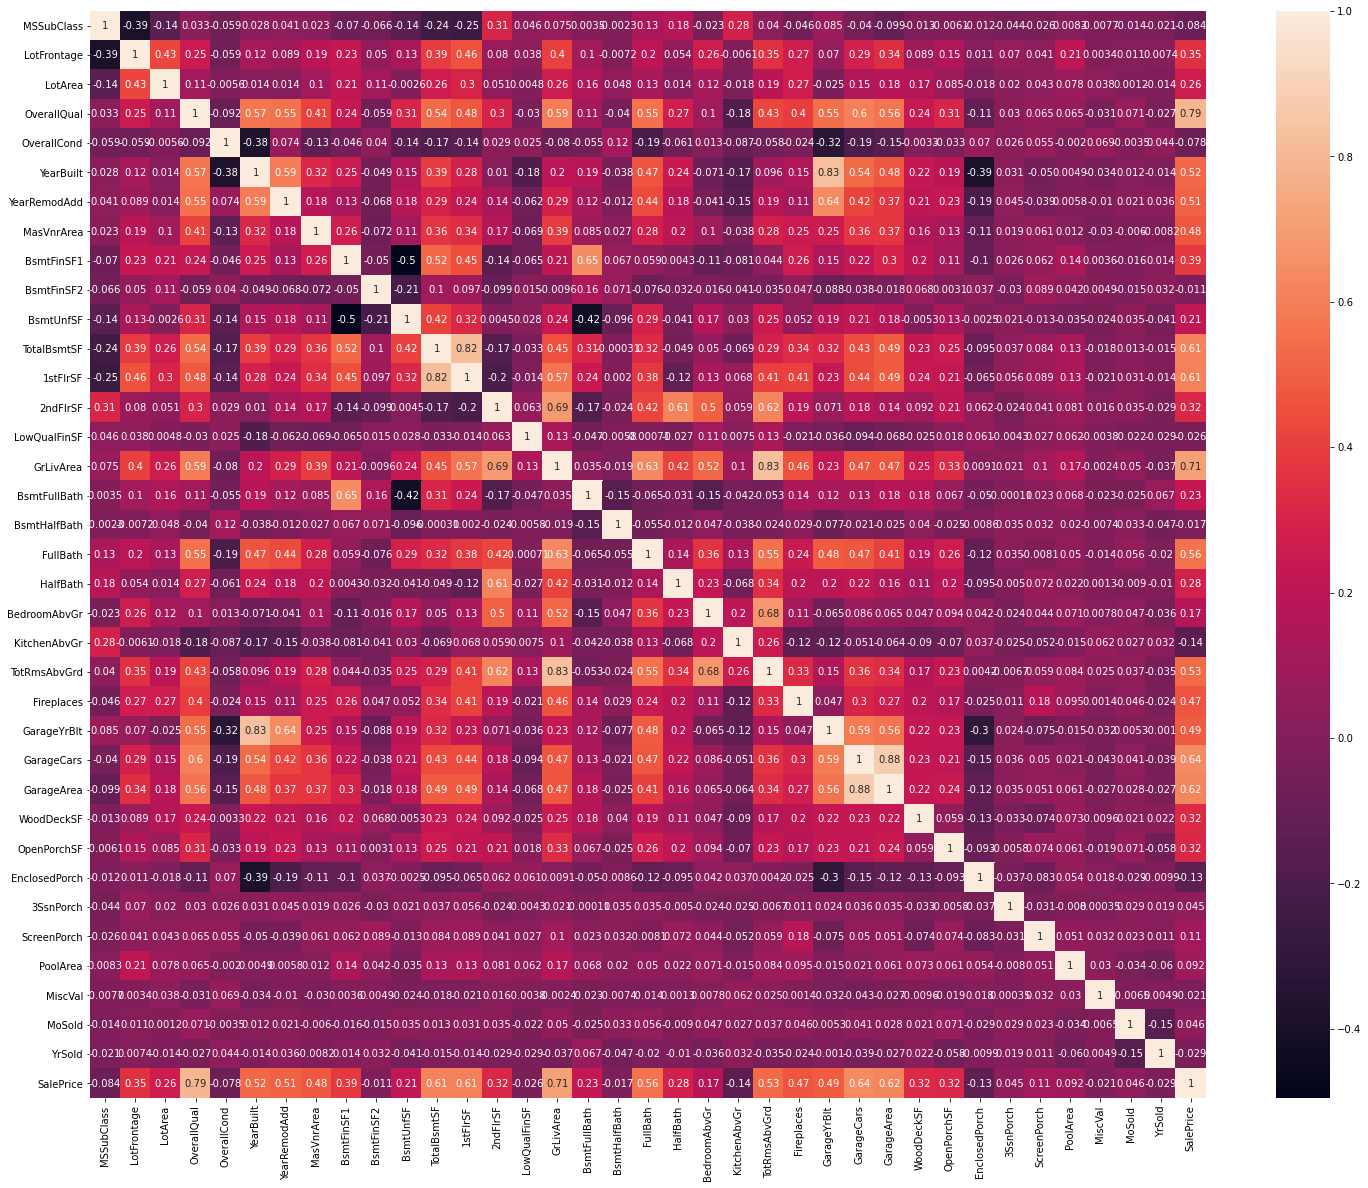

In [180]:
plt.figure(figsize=(25,20))
sns.heatmap(train.corr(),annot=True);

In [181]:
##filtering only categoric atributes
train_cat=list(train.select_dtypes(include='object'))
np.array(train_cat)

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype='<U13')

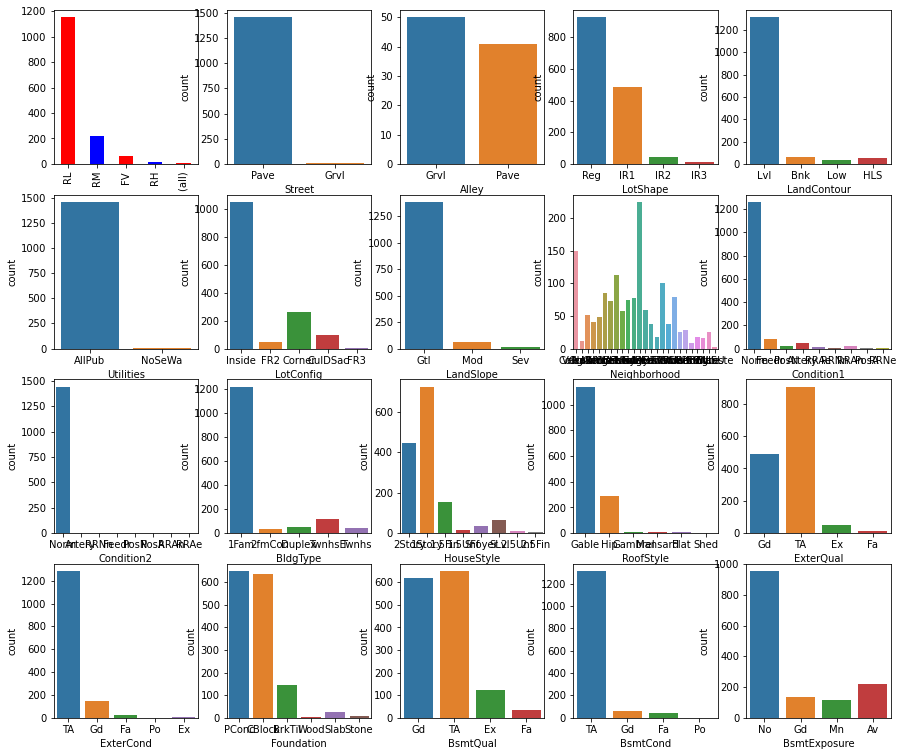

In [182]:
plt.subplot(9,5,1)
train['MSZoning'].value_counts().plot.bar(figsize=(15,30),color=['r','b'])
plt.subplot(9,5,2)
sns.countplot(x='Street', data=train)
plt.subplot(9,5,3)
sns.countplot(x='Alley', data=train)
plt.subplot(9,5,4)
sns.countplot(x='LotShape', data=train)
plt.subplot(9,5,5)
sns.countplot(x='LandContour', data=train)
plt.subplot(9,5,6)
sns.countplot(x='Utilities', data=train)
plt.subplot(9,5,7)
sns.countplot(x='LotConfig', data=train)
plt.subplot(9,5,8)
sns.countplot(x='LandSlope', data=train)
plt.subplot(9,5,9)
sns.countplot(x='Neighborhood', data=train)
plt.subplot(9,5,10)
sns.countplot(x='Condition1', data=train)
plt.subplot(9,5,11)
sns.countplot(x='Condition2', data=train)
plt.subplot(9,5,12)
sns.countplot(x='BldgType', data=train)
plt.subplot(9,5,13)
sns.countplot(x='HouseStyle', data=train)
plt.subplot(9,5,14)
sns.countplot(x='RoofStyle', data=train)
plt.subplot(9,5,15)
sns.countplot(x='ExterQual', data=train)
plt.subplot(9,5,16)
sns.countplot(x='ExterCond', data=train)
plt.subplot(9,5,17)
sns.countplot(x='Foundation', data=train)
plt.subplot(9,5,18)
sns.countplot(x='BsmtQual', data=train)
plt.subplot(9,5,19)
sns.countplot(x='BsmtCond', data=train)
plt.subplot(9,5,20)
sns.countplot(x='BsmtExposure', data=train);


## Data Cleaning

In [183]:
#removing unbalanced columns and columns without correlation with prices.
train=train.drop(['3SsnPorch','PoolArea','MiscVal','LowQualFinSF','KitchenAbvGr',
                  'EnclosedPorch','BsmtFinSF2','LotArea','BsmtHalfBath','GarageCond','GarageQual',
                  'GarageFinish','KitchenQual','CentralAir','HeatingQC','RoofStyle','MSZoning',
                  'LandContour','LotConfig','Condition1','Heating','Electrical'],axis=1)
test=test.drop(['3SsnPorch','PoolArea','MiscVal','LowQualFinSF','KitchenAbvGr',
                  'EnclosedPorch','BsmtFinSF2','LotArea','BsmtHalfBath','GarageCond','GarageQual',
                  'GarageFinish','KitchenQual','CentralAir','HeatingQC','RoofStyle','MSZoning',
                  'LandContour','LotConfig','Condition1','Heating','Electrical'],axis=1)

#removing columns with 500+ null values(in test data):
null=test.loc[:,test.isnull().sum()>500]
test=test.drop(null,axis=1)
train=train.drop(null,axis=1)

Encoding 

In [184]:
##filtering only categoric atributes
train_cat=list(train.select_dtypes(include='object'))

encode=OrdinalEncoder()
cat_ordinal=pd.DataFrame(encode.fit_transform(train[train_cat].astype(str)),columns=train_cat)
for i in cat_ordinal.columns:
    train[i]=cat_ordinal[i]
    test[i]=cat_ordinal[i]

## Modeling

I will use Lasso regression, Elastic Net and Gradient Boosting Regressor.

In [185]:
y=abs(train.dropna()['SalePrice'])
X=train.dropna().drop(columns='SalePrice')

In [186]:
#models
Lasso = Lasso()
elastic_model = ElasticNetCV()
Grad_boost = XGB.XGBRegressor()
names=['Lasso','elastic_model','Grad_boost']
models=[Lasso,elastic_model,Grad_boost]


### Hyperparameter Tunning

In [191]:
#evaluation functions
kfold = StratifiedKFold(n_splits = 6)
def model_perf(model, X_train, y_train):
    cv_scores = cross_val_score(model, X, y, n_jobs = 4, cv = kfold, scoring = 'neg_mean_absolute_error')
    mean = cv_scores.mean()
    std = cv_scores.std()
    
    return mean, std



def run_all(models, models_name):
    
    models_mean = []
    models_std = []
    
    for model in models:
        mean, std = model_perf(model, X, y)
        models_mean.append(mean)
        models_std.append(std)
        
    results = pd.DataFrame({"Model_Name" : models_name, "Mean_score" : models_mean, "STD_score" : models_std})
    
    return results

In [192]:
#first parameters to test
from sklearn.linear_model import Lasso
models_grid = {
    "Lasso" : {
        "model" : Lasso(),
        "parameters" : {
            'alpha':[0.01,0.1, 0.5, 1, 10,50, 100, 200] 
            
        }
    },
    
    "elastic_model" : {
        "model" : ElasticNetCV(),
        "parameters" : {
            "l1_ratio": np.linspace(0.01, 1, 100)
        }
    },

    "Grad_boost" : {
        "model" : XGB.XGBRegressor(),
        "parameters" : {
            "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
            "gamma": [0.01, 0.05, 0.1, 0.5, 1]
        }
    },
    
    
    
}


In [193]:
scores = []
params = []
best_estimators = []
for estimator_info in models_grid.keys():
    estimator = models_grid[estimator_info]
    grid_srch = GridSearchCV(estimator = estimator['model'], param_grid = estimator['parameters'], 
                             scoring = 'neg_mean_absolute_error', n_jobs = 4, cv = kfold)
    grid_srch.fit(X, y)
    scores.append(grid_srch.best_score_)
    params.append(grid_srch.best_params_)
    best_estimators.append(grid_srch.best_estimator_)

In [194]:
run_all(models,names)

,Model_Name,Mean_score,STD_score
0,Lasso,-24332.750672,1436.435684
1,elastic_model,-29817.317414,3163.227455
2,Grad_boost,-19123.134999,1668.000350


Here I decided to use Gradient Boosting model, and I will make the hyperparemeter tunning again, more precise this time and using the same error measurement used at kaggle evaluation;

In [195]:
#obs: here I made several changes in the parameters to reach the best ones.
models_grid = {
    "Grad_boost" : {
        "model" : XGBRegressor(colsample_bylevel=1, booster='gbtree', gpu_id=-1,interaction_constraints='',
             nthread=-1, tree_method='exact',validate_parameters=1, verbosity=None),
        "parameters" : {
            "num_parellel_tree":[7],
            "n_jobs":[2],
            "max_depth":[8],
            "colsample_bynode":[0.79],
            "learning_rate":[0.0481],
            "random_state":[2,3,4,5],
            "gamma":[0.0431],
            "n_estimators":[2198],
            "colsample_bytree":[0.45],
            "min_child_weight":[1.7],
            "reg_alpha":[0.45],
            "reg_lambda":[0.855],
            "subsample":[0.5205],
            "scale_pos_weight":[0],
            "base_score":[0.445]
        }
    },
    
    
}
scores = []
params = []
best_estimators = []
for estimator_info in models_grid.keys():
    estimator = models_grid[estimator_info]
    grid_srch = GridSearchCV(estimator = estimator['model'], param_grid = estimator['parameters'], 
                             scoring = 'neg_mean_squared_log_error', n_jobs = 4, cv = kfold)
    grid_srch.fit(X, y)
    scores.append(grid_srch.best_score_)
    params.append(grid_srch.best_params_)
    best_estimators.append(grid_srch.best_estimator_)
scores , params


([-0.017783429953184982],
 [{'base_score': 0.445,
   'colsample_bynode': 0.79,
   'colsample_bytree': 0.45,
   'gamma': 0.0431,
   'learning_rate': 0.0481,
   'max_depth': 8,
   'min_child_weight': 1.7,
   'n_estimators': 2198,
   'n_jobs': 1,
   'num_parellel_tree': 6,
   'random_state': 3,
   'reg_alpha': 0.45,
   'reg_lambda': 0.855,
   'scale_pos_weight': 0,
   'subsample': 0.5205}])

Using the model with the best parameters found and making the submission:

In [105]:
 xgb=XGBRegressor(base_score=0.445, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.79, colsample_bytree=0.45, gamma=0.0431,
             gpu_id=-1,interaction_constraints='',
             min_child_weight=1.7, monotone_constraints='()',
             n_estimators=2198, n_jobs=2, nthread=-1, num_parallel_tree=7,
             random_state=3, reg_alpha=0.45, reg_lambda=0.855,max_depth=8,
             scale_pos_weight=0, subsample=0.5205, tree_method='exact',
             validate_parameters=1, verbosity=None,learning_rate=0.0481)


xgb.fit(X,y);
submission_predictions = pd.Series(xgb.predict(test), name="SalePrice")
submission_df = pd.DataFrame({"SalePrice" : np.e**submission_predictions, "Id" :test.index})
submission_df.to_csv("submission.csv", index=False)

The submission above putted me around the top 50% at the competition.